In [166]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

In [6]:
# This key will serve all examples in this document.
KEY = "e08cc51109eb404e8adc0bf738a9a484"

# This endpoint will be used in all examples in this quickstart.
ENDPOINT = "https://faceoyak.cognitiveservices.azure.com/"

In [7]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [ ]:
'''
Face Detection
'''

In [191]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://www.biography.com/.image/t_share/MTQ1MzAyNzYzOTgxNTE0NTEz/john-f-kennedy---mini-biography.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(single_face_image_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    draw = ImageDraw.Draw(img)
    for face in detected_faces:
        draw.rectangle(getRectangle(face), outline='red')

    img.show()

drawFaceRectangles()

Drawing rectangle around face... see popup for results.


In [192]:
multi_face_image_url = "http://www.historyplace.com/kennedy/president-family-portrait-closeup.jpg"
multi_image_name = os.path.basename(multi_face_image_url)
# We use detection model 3 to get better performance.
detected_faces2 = face_client.face.detect_with_url(url=multi_face_image_url, detection_model='detection_03')
# </snippet_detectgroup>

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(multi_face_image_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    draw = ImageDraw.Draw(img)
    for face in detected_faces2:
        draw.rectangle(getRectangle(face), outline='red')

    img.show()

print('Detected face IDs from', multi_image_name, ':')
if not detected_faces2:
	raise Exception('No face detected from image {}.'.format(multi_image_name))
else:
    for face in detected_faces2:
        print(face.face_id)
print()

drawFaceRectangles()

Detected face IDs from president-family-portrait-closeup.jpg :
8c6ed453-64da-44dc-854a-ea30345920b4
ae8465ed-3f72-436b-8a30-0a767ad2f839
0f30b490-6e3d-4981-a552-eab6b61a541d
0c514ab0-4994-4af5-976a-a5dd82b645fe
dff91a91-9d9a-42fd-9846-582a5bc4f77c
c9d328dc-c1ba-47db-8158-a8624a757122
197855bd-48d3-4e08-b8cc-78bc5ae0ec0d
889a0b07-c658-4681-86da-ca96aa6e87b0
e539bbb0-fcef-4feb-8365-d01b188afd80

Drawing rectangle around face... see popup for results.


In [ ]:
'''
Face Identification
'''

In [146]:

# You can call list_person_groups to print a list of preexisting PersonGroups.
# SOURCE_PERSON_GROUP_ID should be all lowercase and alphanumeric. For example, 'mygroupname' (dashes are OK).
PERSON_GROUP_ID = "users" # assign a random ID (or name it anything)


In [148]:
'''
Create the PersonGroup
'''
# Create empty Person Group. Person Group ID must be lower case, alphanumeric, and/or with '-', '_'.
print('Person group:', PERSON_GROUP_ID)
face_client.person_group.create(person_group_id=PERSON_GROUP_ID, name=PERSON_GROUP_ID)

zeynep = face_client.person_group_person.create(PERSON_GROUP_ID, "Zeynep")

ahmet = face_client.person_group_person.create(PERSON_GROUP_ID, "Ahmet")

eliff = face_client.person_group_person.create(PERSON_GROUP_ID, "Elif")

Person group: users


In [172]:
import matplotlib.pyplot as plt
source = "C:\\Users\\v-edaayan\\Downloads\\Face"


# all jpeg images of friends in working directory
zeynep_images = [file for file in glob.glob('C:\\Users\\v-edaayan\\Downloads\\Face/*.jpg') if "woman" in file]
ahmet_images = [file for file in glob.glob('C:\\Users\\v-edaayan\\Downloads\\Face/*.jpg') if "man" in file]
eliff_images = [file for file in glob.glob('C:\\Users\\v-edaayan\\Downloads\\Face/*.jpg') if "child" in file]

# Add to a woman person
for image in zeynep_images:
    w = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, zeynep.person_id, w)

# Add to a man person
for image in ahmet_images:
    m = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, ahmet.person_id, m)

# Add to a child person
for image in eliff_images:
    ch = open(image, 'r+b')
    face_client.person_group_person.add_face_from_stream(PERSON_GROUP_ID, eliff.person_id, ch)
    


(-0.5, 315.5, 463.5, -0.5)

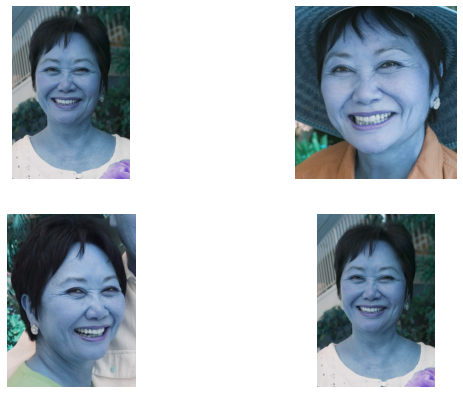

In [176]:
import cv2
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

zeynep_images = [file for file in glob.glob('C:\\Users\\v-edaayan\\Downloads\\Face/*.jpg') if "woman" in file]
# reading images
Image1 = cv2.imread(zeynep_images[0], cv2.COLOR_BGR2RGB)
Image2 = cv2.imread(zeynep_images[1], cv2.COLOR_BGR2RGB)
Image3 = cv2.imread(zeynep_images[2], cv2.COLOR_BGR2RGB)
Image4 = cv2.imread(zeynep_images[3], cv2.COLOR_BGR2RGB)
fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
fig.add_subplot(rows, columns, 3)

plt.imshow(Image3)
plt.axis('off')
fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')



In [151]:
'''
Train PersonGroup
'''
print()
print('Training the person group...')
# Train the person group
face_client.person_group.train(PERSON_GROUP_ID)

while (True):
    training_status = face_client.person_group.get_training_status(PERSON_GROUP_ID)
    print("Training status: {}.".format(training_status.status))
    print()
    if (training_status.status is TrainingStatusType.succeeded):
        break
    elif (training_status.status is TrainingStatusType.failed):
        face_client.person_group.delete(person_group_id=PERSON_GROUP_ID)
        sys.exit('Training the person group has failed.')
    time.sleep(5)


Training the person group...
Training status: running.

Training status: succeeded.



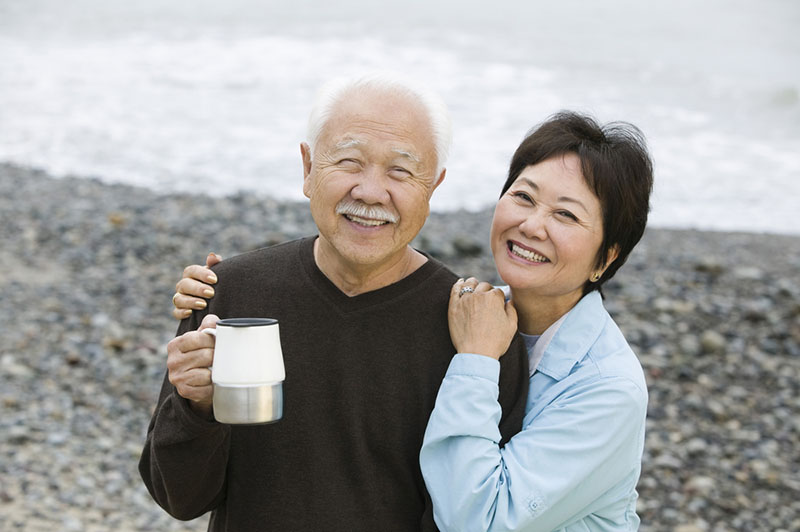

In [152]:
from IPython.display import display, Image
display(Image(filename='C:\\Users\\v-edaayan\\Downloads\\Face\\test-image-person-group.jpg'))

In [177]:
def detect_faces(client, query_images_list):
    print('Detecting faces in query images list...')

    face_ids = {} # Keep track of the image ID and the related image in a dictionary
    for image_name in query_images_list:
        image = open(image_name, 'rb') # BufferedReader
        print("Opening image: ", image.name)
        time.sleep(5)

        # Detect the faces in the query images list one at a time, returns list[DetectedFace]
        faces = client.face.detect_with_stream(image)  

        # Add all detected face IDs to a list
        for face in faces:
            print('Face ID', face.face_id, 'found in image', os.path.splitext(image.name)[0]+'.jpg')
            # Add the ID to a dictionary with image name as a key.
            # This assumes there is only one face per image (since you can't have duplicate keys)
            face_ids[image.name] = face.face_id

    return face_ids

face_ids = detect_faces(face_client, ['C:\\Users\\v-edaayan\\Downloads\\Face\\test-image-person-group.jpg'])



Detecting faces in query images list...
Opening image:  C:\Users\v-edaayan\Downloads\Face\test-image-person-group.jpg
Face ID 697e5382-62c3-4b31-b0d1-9442d750cd0c found in image C:\Users\v-edaayan\Downloads\Face\test-image-person-group.jpg
Face ID 47043823-fcfc-4e13-b3a4-631a364b2847 found in image C:\Users\v-edaayan\Downloads\Face\test-image-person-group.jpg


In [178]:
def identify_face(client, person_group_id, face_ids):
    # Get all image IDs (values) of the detected faces from query inmages
    ids = []
    for value in face_ids.values():
        # Make the list
        ids.append(value) 

    print('Identifying found faces in person group...')
    # We'll create a list of faces not found, for use later in creating a new Person object
    faces_not_found = face_ids
    # For each query face detected, check if they are in the existing person group
    for id in ids:
        # Identify person(s) matching the query face, returns list[IdentifyResult]
        results = client.face.identify([id], person_group_id)

        # Go through each IdentifyResult result to find the candidate (match).
        for result in results:
            for cand in result.candidates: # list[IdentifyCandidate]
                # Get the image name associated with our detected face ID
                image_name = [k for k, v in face_ids.items() if v == id][0]
                print('Found a face from Person ID', cand.person_id, 'from the image', image_name)
                # Delete the dictionary entry for the found face
                faces_not_found.pop(image_name)

    # Return a dictionary of faces not found
    return faces_not_found

faces_not_found = identify_face(face_client, PERSON_GROUP_ID, face_ids)


Identifying found faces in person group...
Found a face from Person ID 76f42e05-79ae-454c-907e-24a5d00ea750 from the image C:\Users\v-edaayan\Downloads\Face\test-image-person-group.jpg


In [179]:
print(zeynep.person_id)

76f42e05-79ae-454c-907e-24a5d00ea750


In [ ]:
'''
Verify
The Verify operation takes a face ID from DetectedFace or PersistedFace and either another face ID or a Person object 
and determines whether they belong to the same person. If you pass in a Person object, you can optionally pass in a 
PersonGroup to which that Person belongs to improve performance.
'''

In [55]:
# Base url for the Verify and Facelist/Large Facelist operations
IMAGE_BASE_URL = 'https://csdx.blob.core.windows.net/resources/Face/Images/'

In [56]:
# Create a list to hold the target photos of the same person
target_image_file_names = ['Family1-Dad1.jpg', 'Family1-Dad2.jpg']
# The source photos contain this person
source_image_file_name1 = 'Family1-Dad3.jpg'
source_image_file_name2 = 'Family1-Son1.jpg'

In [194]:
response = requests.get(IMAGE_BASE_URL + source_image_file_name2)
img = Image.open(BytesIO(response.content))

img.show()

In [195]:
response = requests.get(IMAGE_BASE_URL + target_image_file_names[1])
img = Image.open(BytesIO(response.content))

img.show()

In [57]:
# Detect face(s) from source image 1, returns a list[DetectedFaces]
# We use detection model 3 to get better performance.
detected_faces1 = face_client.face.detect_with_url(IMAGE_BASE_URL + source_image_file_name1, detection_model='detection_03')
# Add the returned face's face ID
source_image1_id = detected_faces1[0].face_id
print('{} face(s) detected from image {}.'.format(len(detected_faces1), source_image_file_name1))

# Detect face(s) from source image 2, returns a list[DetectedFaces]
detected_faces2 = face_client.face.detect_with_url(IMAGE_BASE_URL + source_image_file_name2, detection_model='detection_03')
# Add the returned face's face ID
source_image2_id = detected_faces2[0].face_id
print('{} face(s) detected from image {}.'.format(len(detected_faces2), source_image_file_name2))

# List for the target face IDs (uuids)
detected_faces_ids = []
# Detect faces from target image url list, returns a list[DetectedFaces]
for image_file_name in target_image_file_names:
    # We use detection model 3 to get better performance.
    detected_faces = face_client.face.detect_with_url(IMAGE_BASE_URL + image_file_name, detection_model='detection_03')
    # Add the returned face's face ID
    detected_faces_ids.append(detected_faces[0].face_id)
    print('{} face(s) detected from image {}.'.format(len(detected_faces), image_file_name))

1 face(s) detected from image Family1-Dad3.jpg.
1 face(s) detected from image Family1-Son1.jpg.
1 face(s) detected from image Family1-Dad1.jpg.
1 face(s) detected from image Family1-Dad2.jpg.


In [196]:
# Verification example for faces of the same person. The higher the confidence, the more identical the faces in the images are.
# Since target faces are the same person, in this example, we can use the 1st ID in the detected_faces_ids list to compare.
verify_result_same = face_client.face.verify_face_to_face(source_image1_id, detected_faces_ids[0])
print('Faces from {} & {} are of the same person, with confidence: {}'
    .format(source_image_file_name1, target_image_file_names[0], verify_result_same.confidence)
    if verify_result_same.is_identical
    else 'Faces from {} & {} are of a different person, with confidence: {}'
        .format(source_image_file_name1, target_image_file_names[0], verify_result_same.confidence))

# Verification example for faces of different persons.
# Since target faces are same person, in this example, we can use the 1st ID in the detected_faces_ids list to compare.
verify_result_diff = face_client.face.verify_face_to_face(source_image2_id, detected_faces_ids[0])
print('Faces from {} & {} are of the same person, with confidence: {}'
    .format(source_image_file_name2, target_image_file_names[0], verify_result_diff.confidence)
    if verify_result_diff.is_identical
    else 'Faces from {} & {} are of a different person, with confidence: {}'
        .format(source_image_file_name2, target_image_file_names[0], verify_result_diff.confidence))

Faces from Family1-Dad3.jpg & Family1-Dad1.jpg are of the same person, with confidence: 0.87954
Faces from Family1-Son1.jpg & Family1-Dad1.jpg are of a different person, with confidence: 0.26071


In [197]:
from io import BytesIO
import os
from PIL import Image, ImageDraw
import requests

from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import FaceAttributeType
from msrest.authentication import CognitiveServicesCredentials


'''
Detect face(s) with attributes in a URL image
'''
# Image of face(s)
face1_url = 'https://wallpaperaccess.com/full/3644385.jpg'
face1_name = os.path.basename(face1_url)
face2_url = 'https://images.unsplash.com/photo-1597223557154-721c1cecc4b0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW4lMjBmYWNlfGVufDB8fDB8fA%3D%3D&w=1000&q=80'
face2_name = os.path.basename(face2_url)

# List of url images
url_images = [face1_url, face2_url]

# Attributes you want returned with the API call, a list of FaceAttributeType enum (string format)
face_attributes = ['age', 'gender', 'headPose', 'smile', 'facialHair', 'glasses', 'emotion']

# Detect a face with attributes, returns a list[DetectedFace]
for image in url_images:
    detected_faces = face_client.face.detect_with_url(url=image, return_face_attributes=face_attributes)
    if not detected_faces:
        raise Exception(
            'No face detected from image {}'.format(os.path.basename(image)))

    '''
    Display the detected face with attributes and bounding box
    '''
    # Face IDs are used for comparison to faces (their IDs) detected in other images.
    for face in detected_faces:
        print()
        print('Detected face ID from', os.path.basename(image), ':')
        # ID of detected face
        print(face.face_id)
        # Show all facial attributes from the results
        print()
        print('Facial attributes detected:')
        print('Age: ', face.face_attributes.age)
        print('Gender: ', face.face_attributes.gender)
        print('Head pose: ', face.face_attributes.head_pose)
        print('Smile: ', face.face_attributes.smile)
        print('Facial hair: ', face.face_attributes.facial_hair)
        print('Glasses: ', face.face_attributes.glasses)
        print('Emotion: ')
        print('\tAnger: ', face.face_attributes.emotion.anger)
        print('\tContempt: ', face.face_attributes.emotion.contempt)
        print('\tDisgust: ', face.face_attributes.emotion.disgust)
        print('\tFear: ', face.face_attributes.emotion.fear)
        print('\tHappiness: ', face.face_attributes.emotion.happiness)
        print('\tNeutral: ', face.face_attributes.emotion.neutral)
        print('\tSadness: ', face.face_attributes.emotion.sadness)
        print('\tSurprise: ', face.face_attributes.emotion.surprise)
        print()

    # Convert width height to a point in a rectangle
    def getRectangle(faceDictionary):
        rect = faceDictionary.face_rectangle
        left = rect.left
        top = rect.top
        right = left + rect.width
        bottom = top + rect.height

        return ((left, top), (right, bottom))

    # Download the image from the url, so can display it in popup/browser
    response = requests.get(image)
    img = Image.open(BytesIO(response.content))

    # For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    print()
    draw = ImageDraw.Draw(img)
    for face in detected_faces:
        draw.rectangle(getRectangle(face), outline='red')

    # Display the image in the users default image browser.
    img.show()


Detected face ID from 3644385.jpg :
0661350c-22c3-4098-9b22-bec56a855424

Facial attributes detected:
Age:  32.0
Gender:  Gender.male
Head pose:  {'additional_properties': {}, 'roll': -8.1, 'yaw': -24.6, 'pitch': -8.9}
Smile:  0.0
Facial hair:  {'additional_properties': {}, 'moustache': 0.4, 'beard': 0.4, 'sideburns': 0.1}
Glasses:  GlassesType.no_glasses
Emotion: 
	Anger:  0.017
	Contempt:  0.001
	Disgust:  0.0
	Fear:  0.0
	Happiness:  0.0
	Neutral:  0.981
	Sadness:  0.001
	Surprise:  0.0

Drawing rectangle around face... see popup for results.


Detected face ID from photo-1597223557154-721c1cecc4b0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aHVtYW4lMjBmYWNlfGVufDB8fDB8fA%3D%3D&w=1000&q=80 :
fcd6dfe5-9a75-4a05-abc6-534b49733caa

Facial attributes detected:
Age:  26.0
Gender:  Gender.female
Head pose:  {'additional_properties': {}, 'roll': 1.4, 'yaw': 4.0, 'pitch': -8.5}
Smile:  0.937
Facial hair:  {'additional_properties': {}, 'moustache': 0.0, 'beard': 0.0, 'sideburns': 0.0}
G

In [180]:
'''
FACELIST
This example adds single-faced images from URL to a list, then gets data from the list.
'''
print('-----------------------------')
print()
print('FACELIST OPERATIONS')
print()

# Create our list of URL images
image_file_names = [
    "Family1-Dad1.jpg",
    "Family1-Daughter1.jpg",
    "Family1-Mom1.jpg",
    "Family1-Son1.jpg",
    "Family2-Lady1.jpg",
    "Family2-Man1.jpg",
    "Family3-Lady1.jpg",
    "Family3-Man1.jpg"
]

# Create an empty face list with an assigned ID.
face_list_id = "my-face-list"
print("Creating face list: {}...".format(face_list_id))
print()
face_client.face_list.create(face_list_id=face_list_id, name=face_list_id)

# Add each face in our array to the facelist
for image_file_name in image_file_names:
    face_client.face_list.add_face_from_url(
        face_list_id=face_list_id,
        url=IMAGE_BASE_URL + image_file_name,
        user_data=image_file_name
    )

# Get persisted faces from the face list.
the_face_list = face_client.face_list.get(face_list_id)
if not the_face_list :
    raise Exception("No persisted face in face list {}.".format(face_list_id))

print('Persisted face ids of images in face list:')
print()
for persisted_face in the_face_list.persisted_faces:
    print(persisted_face.persisted_face_id)

# Delete the face list, so you can retest (recreate) the list with same name.
face_client.face_list.delete(face_list_id=face_list_id)
print()
print("Deleted the face list: {}.\n".format(face_list_id))


-----------------------------

FACELIST OPERATIONS

Creating face list: my-face-list...

Persisted face ids of images in face list:

3962ef9f-6334-4f3a-9bcf-61d27b5bb0b4
1b7bfe7e-1806-4d3f-887c-b1dc2809e34e
7d08329e-43f4-4e14-8f2a-437b83be53c2
8fff33f4-a5ea-4f53-aacf-d278c3a679b0
9d69d3ce-d750-402e-956a-665abe9febb2
14bf8f5e-a87c-4b68-8527-7292d898ccff
47d210d6-c0ba-4299-bb4b-695aaeb52d4a
7bfdcca6-d2b3-48c7-b709-43cdfb026edb

Deleted the face list: my-face-list.



In [ ]:
'''

Using REST API

'''

In [188]:
import json, os, requests

subscription_key = "e08cc51109eb404e8adc0bf738a9a484"

face_api_url = "https://faceoyak.cognitiveservices.azure.com/" + '/face/v1.0/detect'

image_url = 'https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg'

response = requests.get(image_url)
img = Image.open(BytesIO(response.content))

img.show()



headers = {'Ocp-Apim-Subscription-Key': subscription_key}

params = {
    'detectionModel': 'detection_03',
    'returnFaceId': 'true'
}

response = requests.post(face_api_url, params=params,
                         headers=headers, json={"url": image_url})
print(json.dumps(response.json()))

[{"faceId": "a8f0e0eb-5994-46a8-93b5-48451144238e", "faceRectangle": {"top": 139, "left": 118, "width": 89, "height": 126}}, {"faceId": "5980082a-efc8-4edd-bff2-7ff3e64d8d29", "faceRectangle": {"top": 95, "left": 494, "width": 92, "height": 115}}, {"faceId": "4a000e3d-1f70-4a9a-80c6-8b703d538584", "faceRectangle": {"top": 131, "left": 12, "width": 92, "height": 110}}, {"faceId": "4a238fb8-39e6-41ac-b33e-ad2d05745a34", "faceRectangle": {"top": 149, "left": 389, "width": 82, "height": 107}}, {"faceId": "ac030d6d-9f9c-4f14-a3bc-dc2141af9e6b", "faceRectangle": {"top": 136, "left": 226, "width": 83, "height": 104}}, {"faceId": "c258e17e-36c5-4a8e-89b9-0c6e60743482", "faceRectangle": {"top": 143, "left": 320, "width": 68, "height": 90}}]
